# [geopandas](http://geopandas.org/)
* 圖資顯示模組

In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)
%matplotlib inline
import pickle

In [2]:
tw1 = gp.read_file('tw縣市圖資///COUNTY_MOI_1081121.shp')
tw2 = gp.read_file('tw區鄉鎮圖資///TOWN_MOI_1081121.shp')
tw3 = gp.read_file('tw村里圖資/VILLAGE_MOI_1081121.shp')

In [3]:
print(tw1.shape)
print(tw2.shape)
print(tw3.shape)

(22, 5)
(368, 8)
(7965, 11)


(21.6, 25.6)

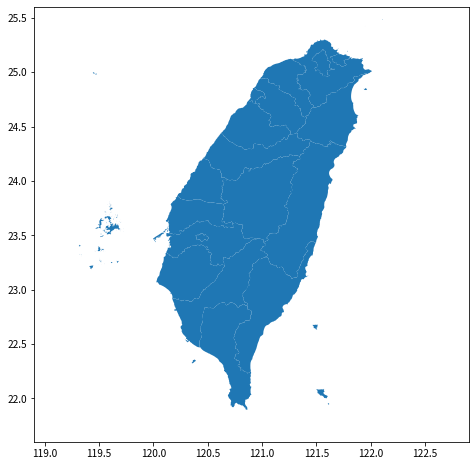

In [4]:
tw1.plot(figsize=(8, 8))

d = 4
x = 118.9
plt.xlim(x, x+d)
y = 21.6
plt.ylim(y, y+d)

(21.6, 25.6)

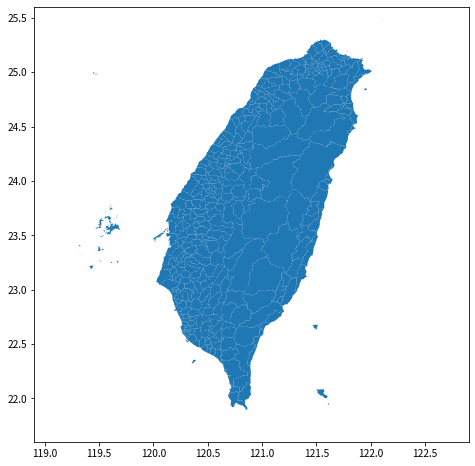

In [5]:
tw2.plot(figsize=(8, 8))

d = 4
x = 118.9
plt.xlim(x, x+d)
y = 21.6
plt.ylim(y, y+d)

(21.6, 25.6)

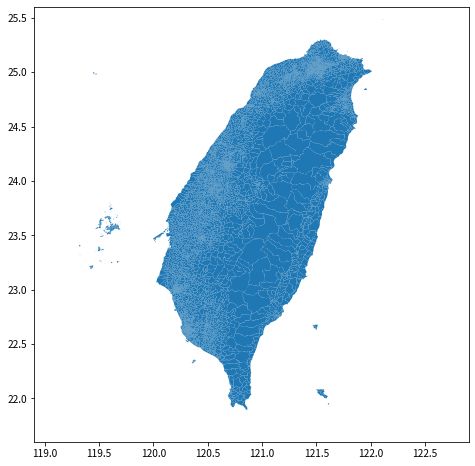

In [6]:
tw3.plot(figsize=(8, 8))

d = 4
x = 118.9
plt.xlim(x, x+d)
y = 21.6
plt.ylim(y, y+d)

In [7]:
def color_code2cmp(code):
    r = int('0x'+code[1:3], 16)
    g = int('0x'+code[3:5], 16)
    b = int('0x'+code[5:], 16)
    
    vals = np.ones((256, 4))
    vals[:, 0] = np.linspace(1, r/256, 256)
    vals[:, 1] = np.linspace(1, g/256, 256)
    vals[:, 2] = np.linspace(1, b/256, 256)
    return matplotlib.colors.ListedColormap(vals)

def party_map(index):
    cmp = color_code2cmp(c_lst[index])
    join_df.plot(column=party_name[index], figsize=(15, 15), cmap=cmp, edgecolor='#808080')
    plt.title(party_name[index], fontsize=20)
    
    d = 4
    x = 118.9
    plt.xlim(x, x+d)
    y = 21.6
    plt.ylim(y, y+d)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.box(0)
    plt.show()
    
def party_map2(index): # 兩層圖層
    cmp = color_code2cmp(c_lst[index])
    base = join_df.plot(figsize=(15, 15), column=party_name[index], cmap=cmp, edgecolor='#a0a0a0', lw=0.25)
    tw1.plot(ax=base, fc='', edgecolor='#808080', rasterized=True)
    plt.title(party_name[index], fontsize=20)

    d = 4
    x = 118.9
    plt.xlim(x, x+d)
    y = 21.6
    plt.ylim(y, y+d)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.box(0)
    plt.show()

### 政黨列表 顏色列表

In [8]:
party_name = ['親民黨', '台灣基進', '時代力量', '國民黨', '民進黨', '民眾黨'] # 政黨
c_lst = ['#ff6213', '#ab3e26', '#ffbf27', '#0008a7', '#009b1c', '#00dbdd'] # 色碼

### 讀入爬蟲的資料 直接切出要的資料

In [9]:
with open('party_vote.pkl', 'rb') as file:
    pk = file.read()
AreaName, Areavote = pickle.loads(pk)

In [10]:
TW_vote = {}
for ind1 in AreaName:
    for ind2 in AreaName[ind1]:
        if not ind2: # 縣市 or 鄉鎮區
            TW_vote[AreaName[ind1][0]] = Areavote[ind1][ind2]

In [11]:
TW_vote = pd.DataFrame(TW_vote)
TW_vote.index = range(1, 20)
TW_vote = TW_vote / TW_vote.sum(0) * 100 # 百分比轉換
TW_vote = TW_vote.T
TW_vote[party_name] = TW_vote[[3, 5, 6, 9, 14, 15]]
TW_vote = TW_vote[party_name]

TW_vote['AREANAME'] = TW_vote.index
TW_vote = TW_vote.reset_index()
lst = ['AREANAME']
lst.extend(party_name)
TW_vote = TW_vote[lst]

In [12]:
tw1['AREANAME'] = tw1.COUNTYNAME
join_df = pd.merge(tw1, TW_vote)

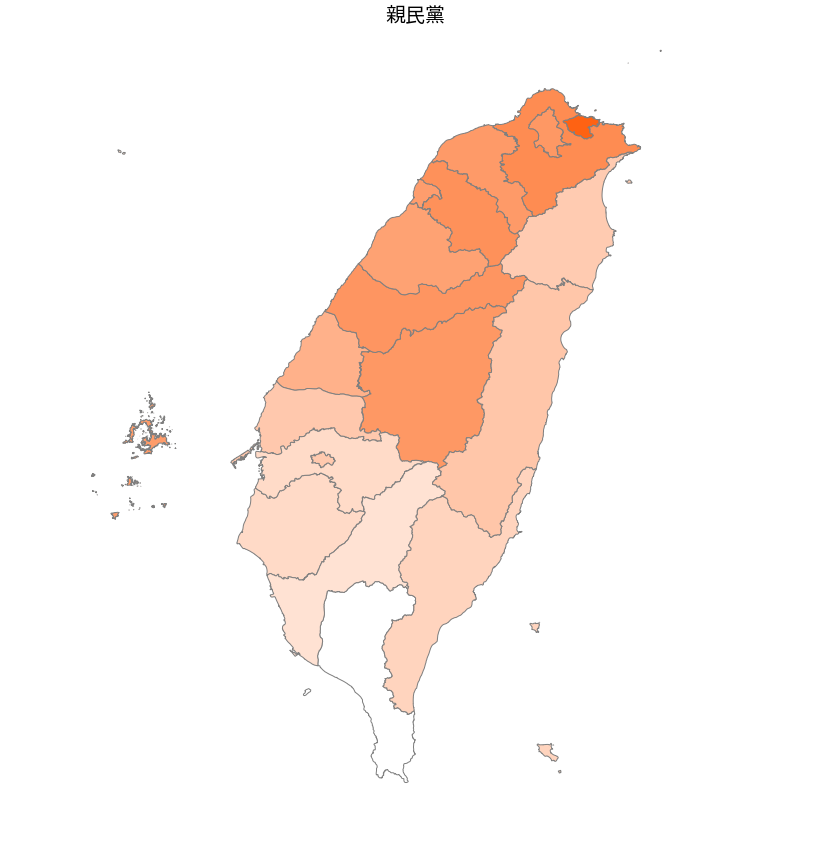

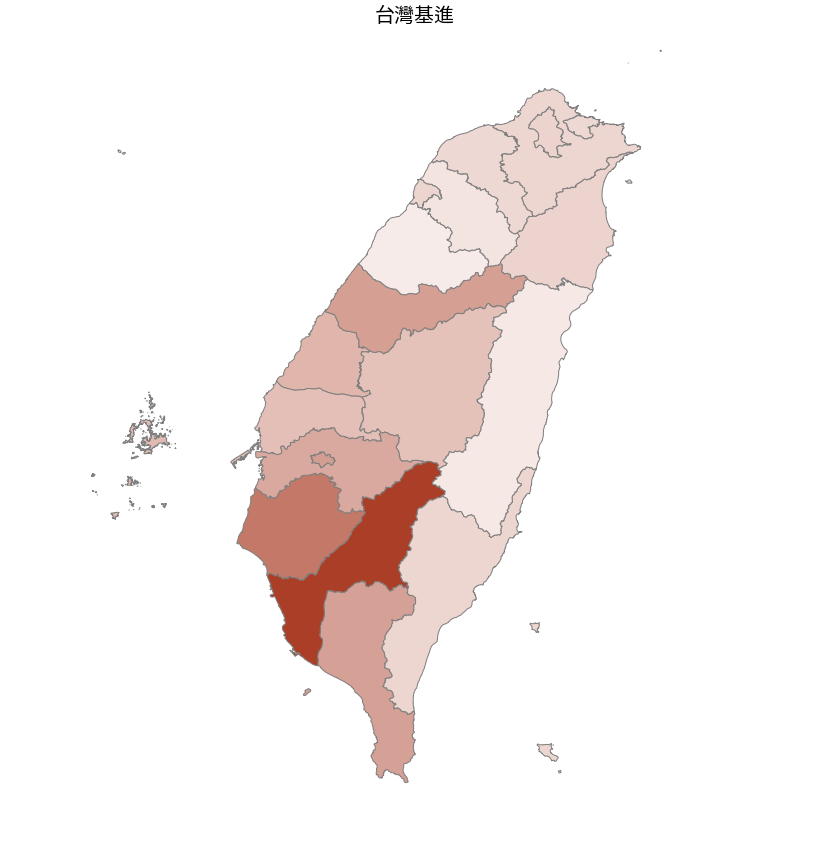

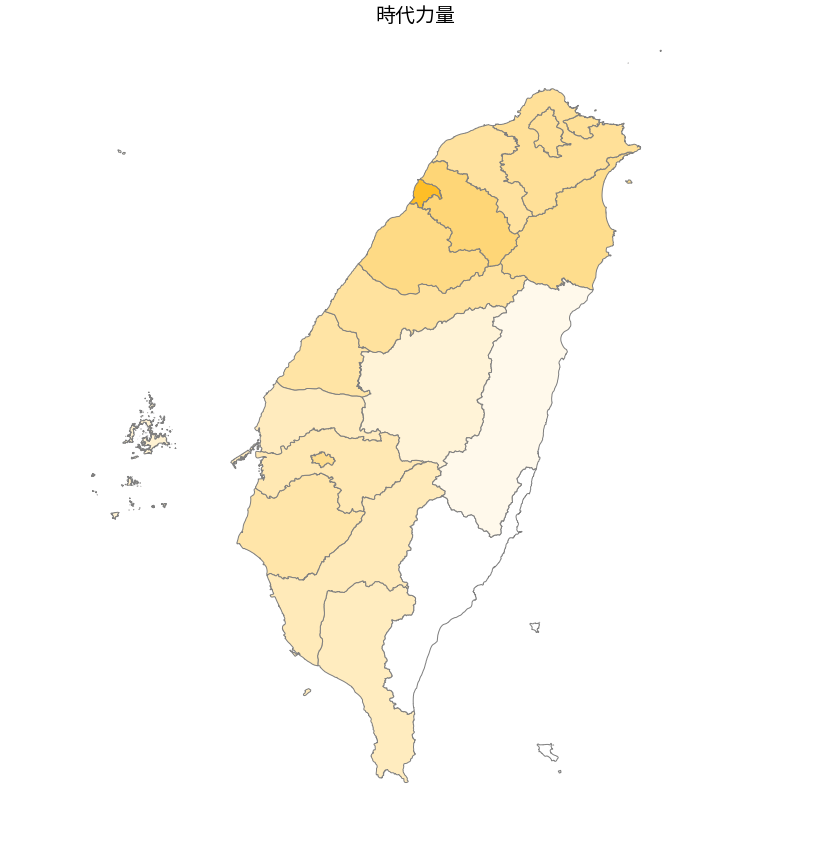

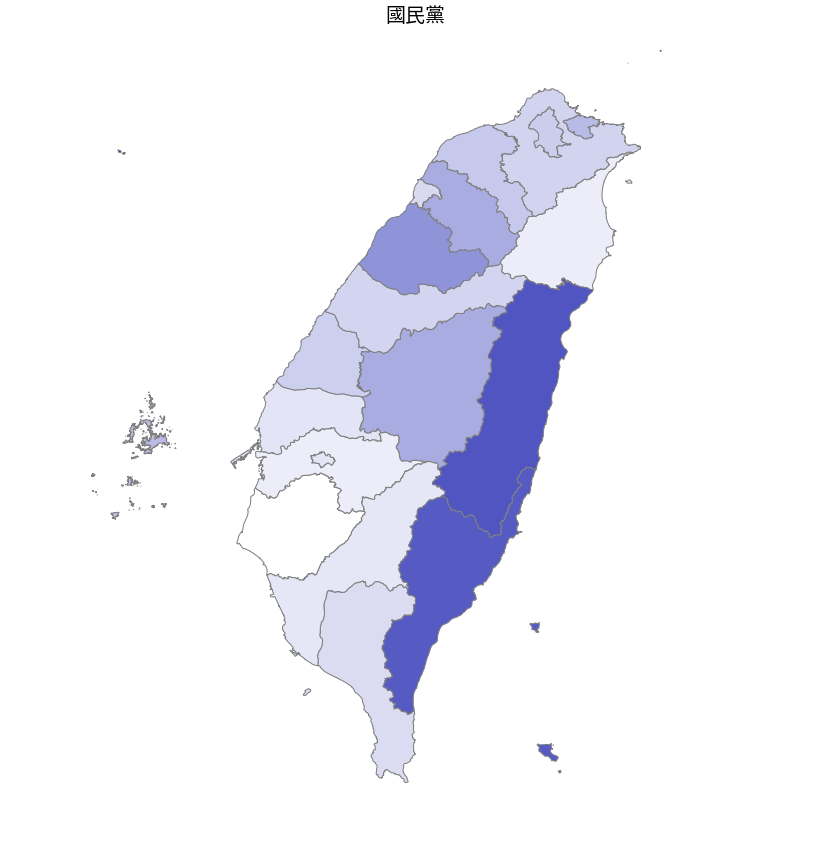

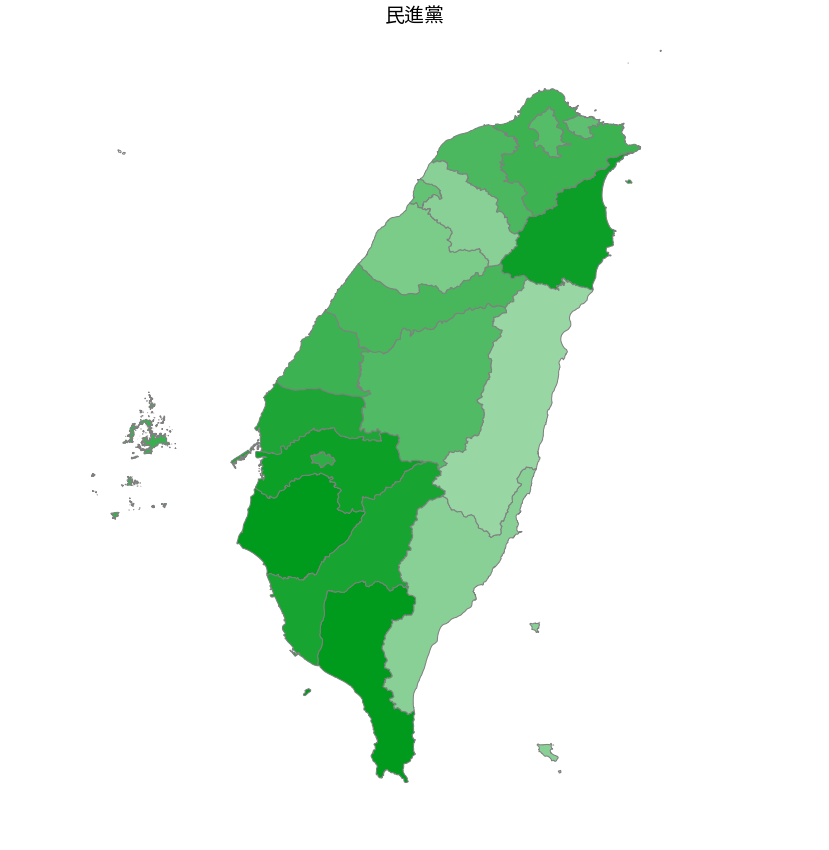

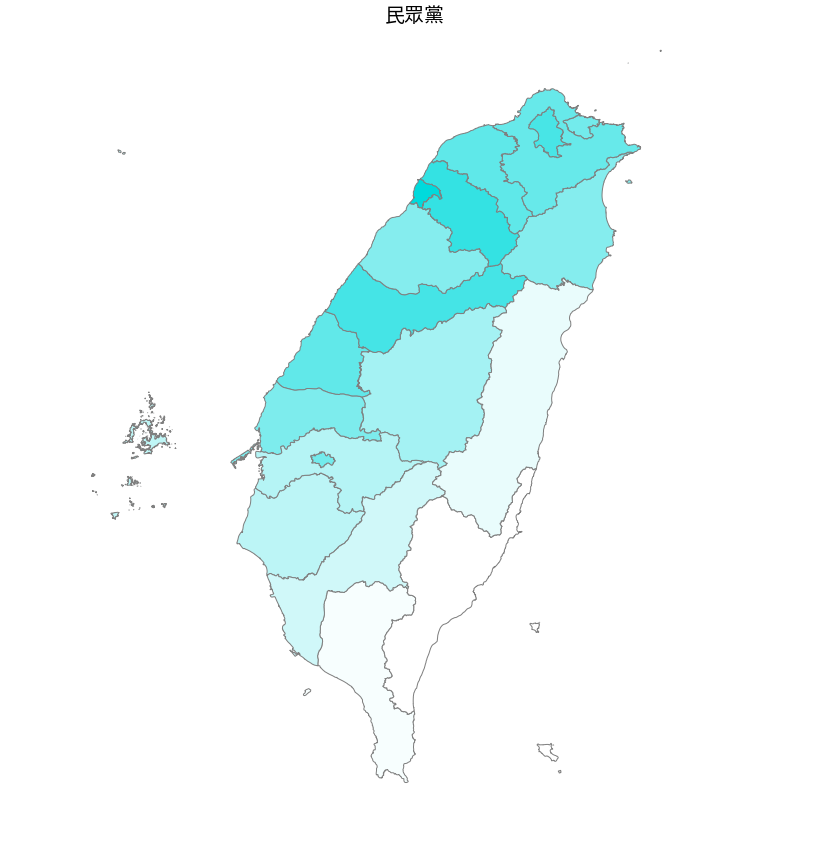

In [13]:
for i in range(6):
    party_map(i)

In [14]:
TW_vote = {}
for ind1 in AreaName:
    for ind2 in AreaName[ind1]:
        if ind2: # 縣市 or 鄉鎮區
            TW_vote[AreaName[ind1][0] + AreaName[ind1][ind2]] = Areavote[ind1][ind2]

In [15]:
TW_vote = pd.DataFrame(TW_vote)
TW_vote.index = range(1, 20)
TW_vote = TW_vote / TW_vote.sum(0) * 100 # 百分比轉換
TW_vote = TW_vote.T
TW_vote[party_name] = TW_vote[[3, 5, 6, 9, 14, 15]]
TW_vote = TW_vote[party_name]

TW_vote['AREANAME'] = TW_vote.index
TW_vote = TW_vote.reset_index()
lst = ['AREANAME']
lst.extend(party_name)
TW_vote = TW_vote[lst]

In [16]:
tw2['AREANAME'] = tw2.COUNTYNAME.str[:] + tw2.TOWNNAME.str[:]
join_df = pd.merge(tw2, TW_vote)

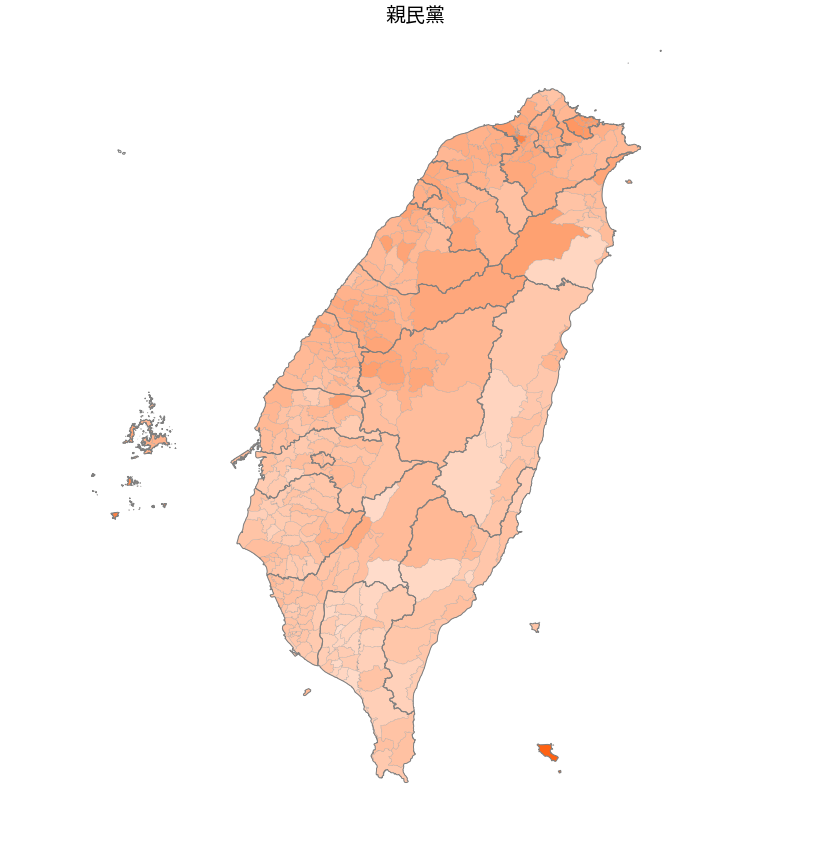

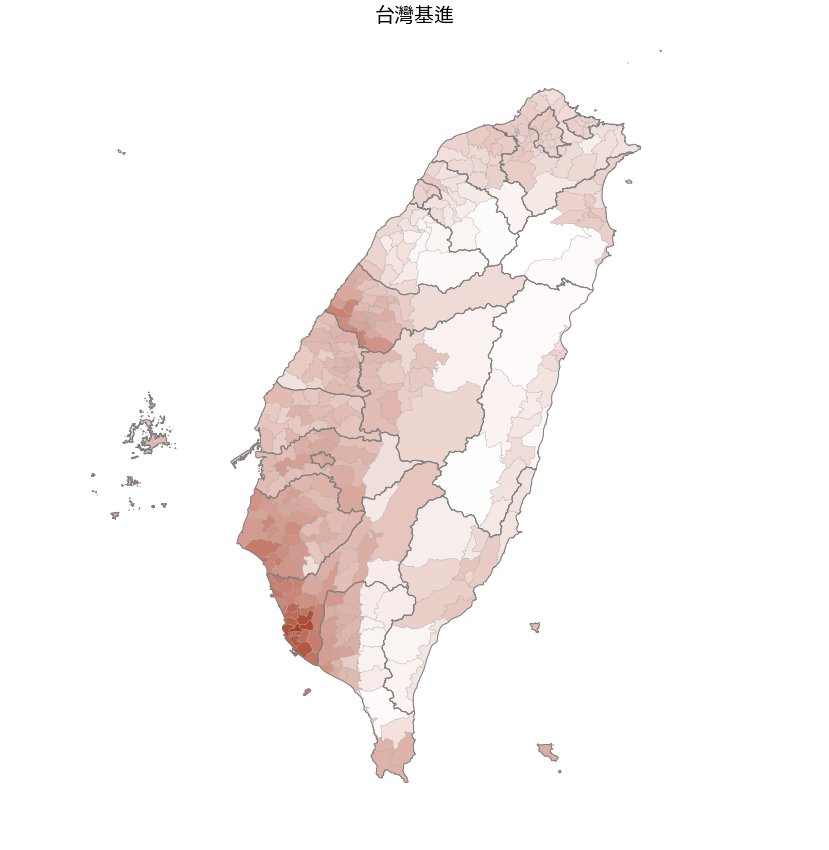

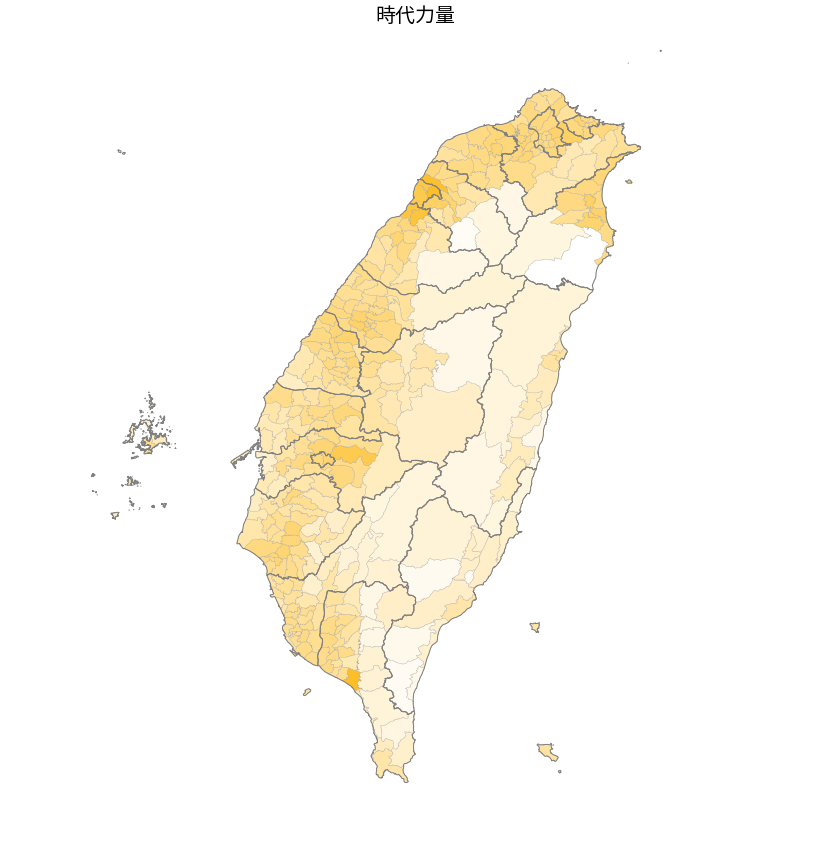

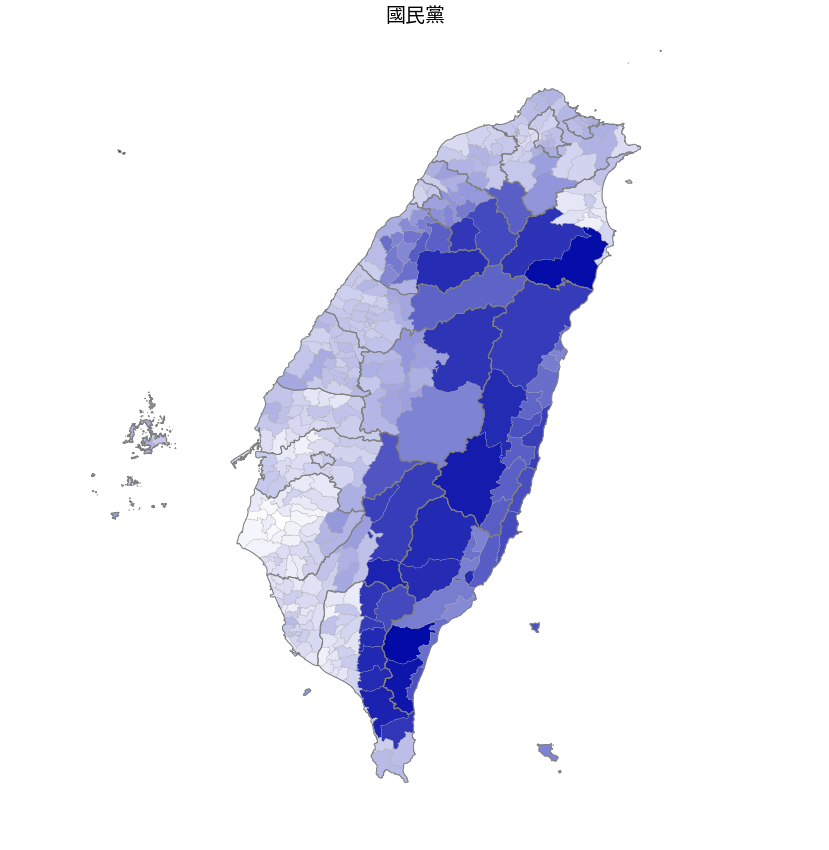

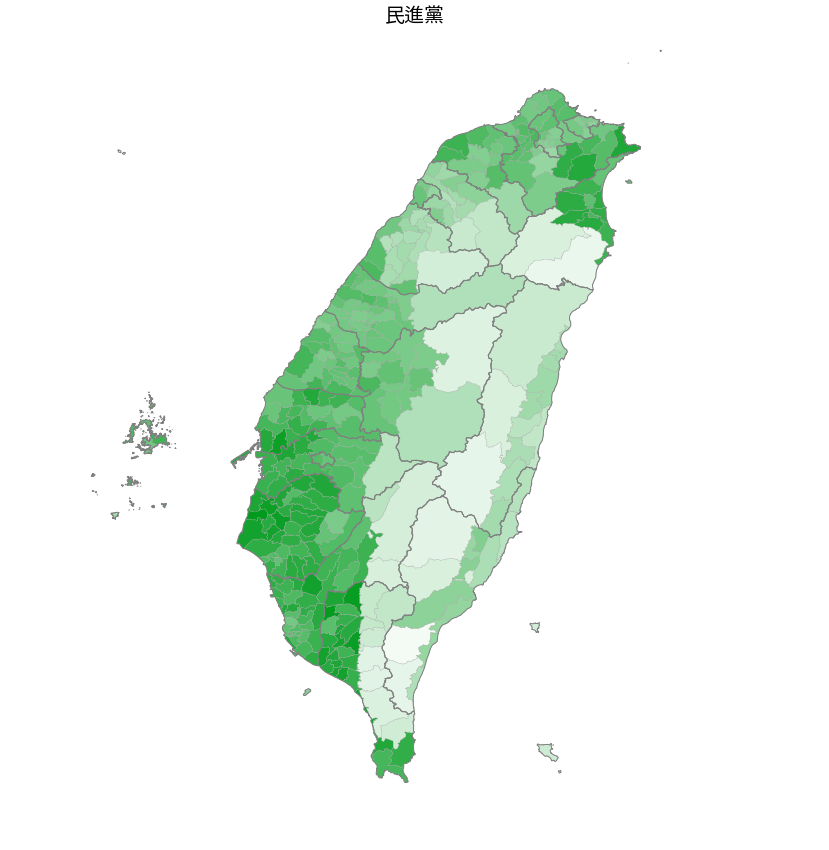

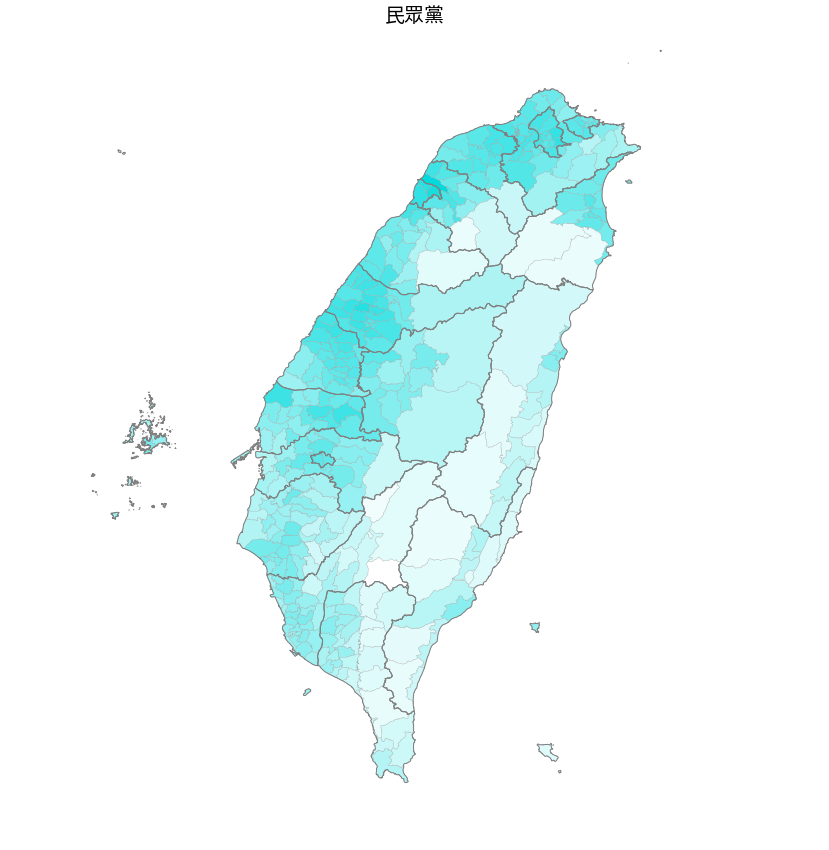

In [17]:
for i in range(6):
    party_map2(i)

### 疊圖
* [參數設定](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Polygon.html)
* `fc=''` 會變成透明的？

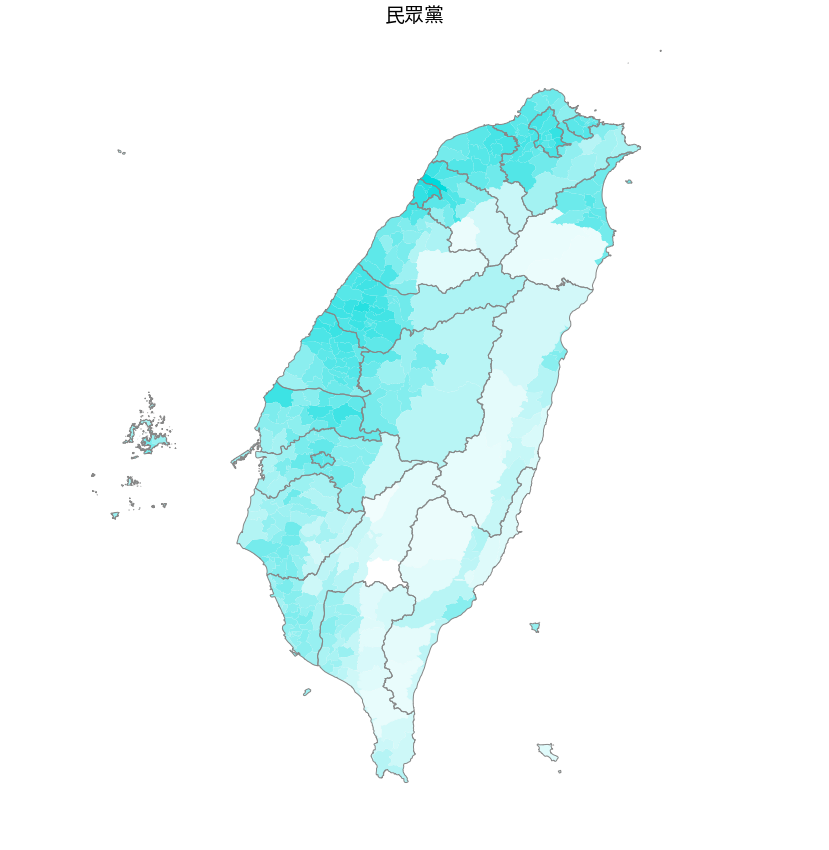

In [19]:
index = 5

cmp = color_code2cmp(c_lst[index])
base = join_df.plot(figsize=(15, 15), column=party_name[index], cmap=cmp, edgecolor=None)
tw1.plot(ax=base, fc='', edgecolor='#888888', rasterized=True)

plt.title(party_name[index], fontsize=20)
d = 4
x = 118.9
plt.xlim(x, x+d)
y = 21.6
plt.ylim(y, y+d)
plt.xticks([], [])
plt.yticks([], [])
plt.box(0)
plt.show()